In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform, chi2

In [32]:
num_samples = 10000
a_values = [5**13, 7**11, 11**7, 13**5]
c_values = [2**31, 2**43, 2**59, 2**61]
num_bins = 50
alpha = 0.05 

In [33]:
def chi_squared_test(random_numbers, num_bins, alpha):
    # Обчислюємо спостережувані частоти
    observed_frequencies, bin_edges = np.histogram(random_numbers, bins=num_bins, density=True)

    # Обчислюємо середини інтервалів
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    
    # Обчислюємо очікувані частоти за допомогою нормального розподілу
    expected_frequencies = uniform.pdf(np.linspace(0, 1, num_bins))
    
    # Обчислюємо статистику хі-квадрат
    chi_squared_statistic = np.sum((observed_frequencies - expected_frequencies) ** 2 / expected_frequencies)
    
    # Визначаємо ступені свободи
    degrees_of_freedom = num_bins - 1

    # Обчислюємо критичне значення хі-квадрат
    chi_squared_critical = chi2.ppf(1 - alpha, degrees_of_freedom)
    
    return chi_squared_statistic, chi_squared_critical


In [34]:
def generate_sample(a, c, num_samples):
    z = np.zeros(num_samples)
    x = np.zeros(num_samples)
    z[0] = 1
    
    for i in range(1, num_samples):
        z[i] = (a * z[i-1]) % c
        x[i] = (z[i] / c) 
        
    return x

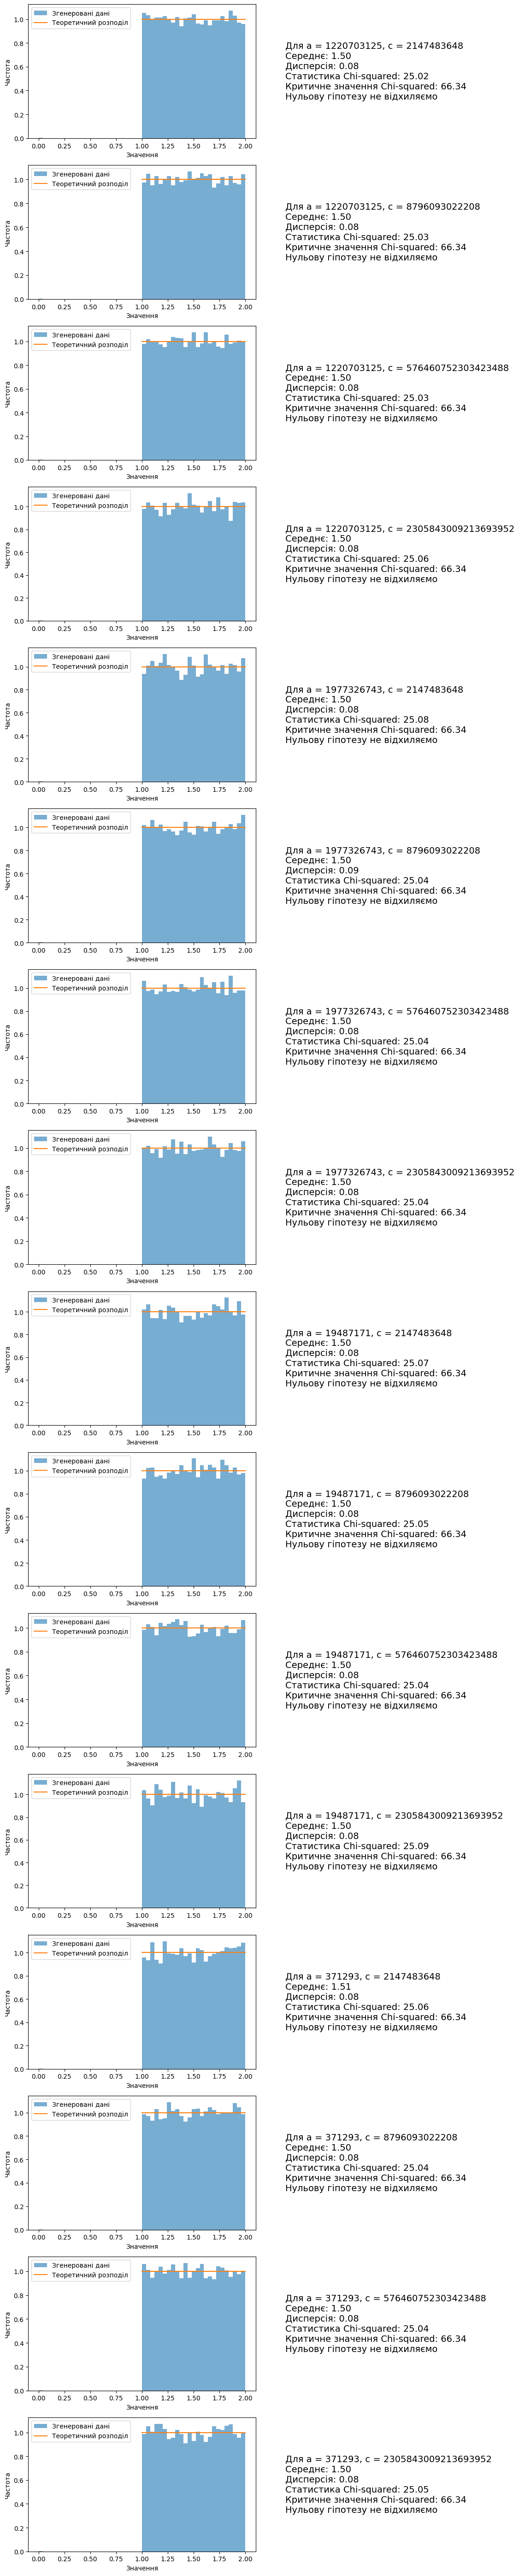

In [35]:
fig, axs = plt.subplots(len(a_values) * len(c_values), 2, figsize=(12, 56))

for i, a in enumerate(a_values):
    for j, c in enumerate(c_values):
        # Генерація вибірки за формулою 
        x_values = generate_sample(a, c, num_samples)

        # Обчислення середнього і дисперсії
        mean = np.mean(x_values)
        variance = np.var(x_values)
        
        # Теоретичний розподіл
        uniform_pdf = uniform.pdf(np.linspace(0, 1, num_bins))
        
        # Побудова гістограми та теоретичного розподілу
        axs[i * len(c_values) + j, 0].hist(x_values, bins=num_bins, density=True, alpha=0.6, label=f'Згенеровані дані')
        axs[i * len(c_values) + j, 0].plot(np.linspace(1, 2, num_bins), uniform_pdf, label=f'Теоретичний розподіл')
        
        # Обчислення статистики хі-квадрат і вивід результатів
        chi_squared_statistic, chi_squared_critical = chi_squared_test(x_values, num_bins, alpha)
        
        text = (f'Для a = {a}, c = {c}\n'
                f'Середнє: {mean:.2f}\n'
                f'Дисперсія: {variance:.2f}\n'
                f'Статистика Chi-squared: {chi_squared_statistic:.2f}\n'
                f'Критичне значення Chi-squared: {chi_squared_critical:.2f}\n')

        if chi_squared_statistic <= chi_squared_critical:
            text += 'Нульову гіпотезу не відхиляємо'
        else:
            text += 'Нульову гіпотезу відхиляємо'
        
        axs[i * len(c_values) + j, 1].axis('off')
        axs[i * len(c_values) + j, 1].text(0.1, 0.5, text, fontsize=14, verticalalignment='center')
        axs[i * len(c_values) + j, 0].legend()
        axs[i * len(c_values) + j, 0].set_xlabel('Значення')
        axs[i * len(c_values) + j, 0].set_ylabel('Частота')

plt.tight_layout()
plt.show()